In [1]:
import pandas as pd

df1 = pd.read_csv("Drug_Utilization.csv", low_memory=False)
df2 = pd.read_csv("Surescripts_County.csv", low_memory=False)
df3 = pd.read_csv("ruralurbancodes2013.csv", low_memory=False)
df4 = pd.read_csv("Surescripts_State.csv", low_memory=False)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## **EXPLORATORY DATA ANALYSIS (EDA)**

In [2]:
print("Dataset 1 Info:")
df1.info()

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132447 entries, 0 to 4132446
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Record ID                       object 
 1   State Code                      object 
 2   NDC                             object 
 3   Labeler Code                    int64  
 4   Product Code                    int64  
 5   Package Size                    object 
 6   Year                            int64  
 7   Quarter                         int64  
 8   Supression Used                 bool   
 9   Product FDA List Name           object 
 10  Units Reimbursed                float64
 11  No. of Prescriptions            float64
 12  Total Amount Reimbursed         float64
 13  Medicaid Amount Reimbursed      float64
 14  Non-Medicaid Amount Reimbursed  float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 445.3+ MB


In [3]:
print("Dataset 1 Summary:")
df1.describe(include='all')

Dataset 1 Summary:


,Record ID,State Code,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Supression Used,Product FDA List Name,Units Reimbursed,No. of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non-Medicaid Amount Reimbursed
count,4132447,4132447,4132447,4.132447e+06,4.132447e+06,4132447,4132447.0,4.132447e+06,4132447,4132447,2.200652e+06,2.200652e+06,2.200652e+06,2.200652e+06,2.200652e+06
unique,2,52,42417,NaN,NaN,106,NaN,NaN,2,16344,NaN,NaN,NaN,NaN,NaN
top,FFSU,XX,00487950125,NaN,NaN,01,NaN,NaN,False,LISINOPRIL,NaN,NaN,NaN,NaN,NaN
freq,2449062,257091,349,NaN,NaN,978830,NaN,NaN,2200652,47803,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.720843e+04,1.777491e+03,NaN,2013.0,2.512307e+00,NaN,NaN,3.129443e+04,5.050530e+02,3.507343e+04,3.374627e+04,1.327166e+03
std,NaN,NaN,NaN,2.831456e+04,2.346107e+03,NaN,0.0,1.120753e+00,NaN,NaN,3.262452e+05,4.120848e+03,5.309365e+05,5.182168e+05,2.831636e+04
min,NaN,NaN,NaN,2.000000e+00,-4.530000e+02,NaN,2013.0,1.000000e+00,NaN,NaN,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,3.780000e+02,2.200000e+02,NaN,2013.0,2.000000e+00,NaN,NaN,8.250000e+02,2.300000e+01,3.697500e+02,3.511100e+02,0.000000e+00
50%,NaN,NaN,NaN,1.392500e+04,6.150000e+02,NaN,2013.0,3.000000e+00,NaN,NaN,2.461000e+03,5.800000e+01,1.364260e+03,1.300670e+03,0.000000e+00
75%,NaN,NaN,NaN,5.898000e+04,2.625000e+03,NaN,2013.0,4.000000e+00,NaN,NaN,9.345000e+03,1.940000e+02,6.185347e+03,5.903615e+03,5.793000e+01


In [4]:
print("Dataset 1 Missing Values:")
df1.isnull().sum()

Dataset 1 Missing Values:


Record ID                               0
State Code                              0
NDC                                     0
Labeler Code                            0
Product Code                            0
Package Size                            0
Year                                    0
Quarter                                 0
Supression Used                         0
Product FDA List Name                   0
Units Reimbursed                  1931795
No. of Prescriptions              1931795
Total Amount Reimbursed           1931795
Medicaid Amount Reimbursed        1931795
Non-Medicaid Amount Reimbursed    1931795
dtype: int64

### Dropping missing values

In [5]:
df1_cleaned = df1.dropna(subset=['Units Reimbursed', 'No. of Prescriptions', 
                               'Total Amount Reimbursed', 'Medicaid Amount Reimbursed', 
                               'Non-Medicaid Amount Reimbursed'])

df1_cleaned.isnull().sum()

Record ID                         0
State Code                        0
NDC                               0
Labeler Code                      0
Product Code                      0
Package Size                      0
Year                              0
Quarter                           0
Supression Used                   0
Product FDA List Name             0
Units Reimbursed                  0
No. of Prescriptions              0
Total Amount Reimbursed           0
Medicaid Amount Reimbursed        0
Non-Medicaid Amount Reimbursed    0
dtype: int64

In [6]:
df1_cleaned

,Record ID,State Code,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Supression Used,Product FDA List Name,Units Reimbursed,No. of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non-Medicaid Amount Reimbursed
1,FFSU,AK,00002322730,2,3227,30,2013,4,False,STRATTERA,1295.0,48.0,9764.94,9011.34,753.60
2,FFSU,AK,00002322830,2,3228,30,2013,4,False,STRATTERA,4047.0,95.0,30686.66,28576.58,2110.08
3,FFSU,AK,00002322930,2,3229,30,2013,4,False,STRATTERA,3683.0,137.0,30485.68,28310.67,2175.01
4,FFSU,AK,00002323560,2,3235,60,2013,4,False,CYMBALTA,4726.0,143.0,33722.79,32547.90,1174.89
5,FFSU,AK,00002323830,2,3238,30,2013,4,False,STRATTERA,1662.0,42.0,12623.51,12089.52,533.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132433,FFSU,WY,76204020060,76204,200,60,2013,1,False,ALBUTEROL,10875.0,50.0,765.47,765.47,0.00
4132438,FFSU,WY,76439010250,76439,102,50,2013,1,False,CEPHALEXIN,518.0,19.0,140.17,140.17,0.00
4132442,FFSU,WY,76439010450,76439,104,50,2013,1,False,AMOXICILLI,917.0,32.0,211.70,211.70,0.00
4132443,FFSU,WY,76439010710,76439,107,10,2013,1,False,DESLORATAD,360.0,12.0,856.44,856.44,0.00


In [7]:
print("Dataset 1 Duplicated Values:")
df1.duplicated().sum()

Dataset 1 Duplicated Values:


0

In [8]:
print("Dataset 2 Info:")
df2.info()

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 8 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Region                                                                                  2937 non-null   object 
 1   Region Code                                                                             2937 non-null   object 
 2   County Name                                                                             2937 non-null   object 
 3   State FIPS                                                                              2937 non-null   int64  
 4   County FIPS                                                                             2937 non-null   int64  
 5   FIPS                                                  

In [9]:
print("Dataset 2 Summary:")
df2.describe(include='all')

Dataset 2 Summary:


,Region,Region Code,County Name,State FIPS,County FIPS,FIPS,Period,Percent of Physicians Actively Using an EHR to e-Prescribe via the Surescripts Network
count,2937,2937,2937,2937.000000,2937.000000,2937.000000,2937,2937.000000
unique,51,51,1732,NaN,NaN,NaN,1,NaN
top,Texas,TX,Washington,NaN,NaN,NaN,2014-04,NaN
freq,217,217,31,NaN,NaN,NaN,2937,NaN
mean,NaN,NaN,NaN,30.138577,101.429350,30240.006129,NaN,0.623252
std,NaN,NaN,NaN,15.147938,104.553181,15164.653239,NaN,0.267953
min,NaN,NaN,NaN,1.000000,1.000000,1001.000000,NaN,0.000000
25%,NaN,NaN,NaN,18.000000,35.000000,18157.000000,NaN,0.470000
50%,NaN,NaN,NaN,29.000000,77.000000,29099.000000,NaN,0.650000
75%,NaN,NaN,NaN,45.000000,131.000000,45039.000000,NaN,0.810000


In [10]:
print("Dataset 2 Missing Values:")
df2.isnull().sum()

Dataset 2 Missing Values:


Region                                                                                    0
Region Code                                                                               0
County Name                                                                               0
State FIPS                                                                                0
County FIPS                                                                               0
FIPS                                                                                      0
Period                                                                                    0
Percent of Physicians Actively Using an EHR to e-Prescribe via the Surescripts Network    0
dtype: int64

In [11]:
print("Dataset 2 Duplicated Values:")
df2.duplicated().sum()

Dataset 2 Duplicated Values:


0

In [12]:
print("Dataset 3 Info:")
df3.info()

Dataset 3 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS             3234 non-null   int64  
 1   State            3234 non-null   object 
 2   County_Name      3234 non-null   object 
 3   Population_2010  3234 non-null   object 
 4   RUCC_2013        3232 non-null   float64
 5   Description      3234 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 151.7+ KB


In [13]:
print("Dataset 3 Summary:")
df3.describe(include='all')

Dataset 3 Summary:


,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
count,3234.000000,3234,3234,3234,3232.000000,3234
unique,NaN,56,1967,3180,NaN,10
top,NaN,TX,Washington County,"21,720",NaN,"Nonmetro - Urban population of 2,500 to 19,999..."
freq,NaN,254,30,3,NaN,597
mean,31544.737786,NaN,NaN,NaN,4.942141,NaN
std,16425.545223,NaN,NaN,NaN,2.723068,NaN
min,1001.000000,NaN,NaN,NaN,1.000000,NaN
25%,19039.500000,NaN,NaN,NaN,2.000000,NaN
50%,30038.000000,NaN,NaN,NaN,6.000000,NaN
75%,46128.500000,NaN,NaN,NaN,7.000000,NaN


In [14]:
print("Dataset 3 Missing Values:")
df3.isnull().sum()

Dataset 3 Missing Values:


FIPS               0
State              0
County_Name        0
Population_2010    0
RUCC_2013          2
Description        0
dtype: int64

In [15]:
print("Dataset 3 Duplicated Values:")
df3.duplicated().sum()

Dataset 3 Duplicated Values:


0

In [16]:
print("Dataset 4 Info:")
df4.info()

Dataset 4 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     3824 non-null   object 
 1   region_code                3824 non-null   object 
 2   period                     3824 non-null   object 
 3   tot_e_Rx                   3511 non-null   float64
 4   tot_e_Rx_thru_ehr          3511 non-null   float64
 5   tot_e_Rx_thru_stand_alone  3511 non-null   float64
 6   tot_primary_care_e_Rx      2376 non-null   float64
 7   tot_non_primary_care_e_Rx  2376 non-null   float64
 8   tot_nurse_prac_e_Rx        2355 non-null   float64
 9   tot_phys_asst_e_Rx         2355 non-null   float64
 10  pct_new_renewal_e_Rx       311 non-null    float64
 11  tot_med_hist_reqs          2268 non-null   float64
 12  tot_med_hist_req_resps     2268 non-null   float64
 13  pct_pharm_enabled          2355 

In [17]:
print("Dataset 4 Summary:")
df4.describe(include='all')

Dataset 4 Summary:


,region,region_code,period,tot_e_Rx,tot_e_Rx_thru_ehr,tot_e_Rx_thru_stand_alone,tot_primary_care_e_Rx,tot_non_primary_care_e_Rx,tot_nurse_prac_e_Rx,tot_phys_asst_e_Rx,pct_new_renewal_e_Rx,tot_med_hist_reqs,tot_med_hist_req_resps,pct_pharm_enabled,pct_pharm_e_Rx
count,3824,3824,3824,3511.000000,3511.000000,3511.000000,2376.000000,2376.000000,2355.000000,2355.00000,311.000000,2.268000e+03,2.268000e+03,2355.000000,3448.000000
unique,54,54,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,New Jersey,NJ,2009-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,72,72,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12363.852179,10401.082313,1856.611222,5702.324074,9377.476431,1755.573248,988.95966,0.292058,1.674085e+06,1.521452e+06,0.923168,0.872094
std,NaN,NaN,NaN,50092.412937,43223.364379,7059.623144,21370.324233,35634.916826,6665.473264,3789.44931,0.214701,6.374540e+06,5.814948e+06,0.099532,0.121326
min,NaN,NaN,NaN,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,5.720000e+02,2.610000e+02,0.000000,0.000000
25%,NaN,NaN,NaN,1403.000000,1098.500000,220.000000,803.500000,1137.000000,240.000000,123.00000,0.105000,1.738150e+05,1.488730e+05,0.920000,0.830000
50%,NaN,NaN,NaN,3509.000000,2880.000000,515.000000,1951.000000,2701.000000,613.000000,300.00000,0.250000,4.851890e+05,4.201975e+05,0.940000,0.910000
75%,NaN,NaN,NaN,8906.500000,7292.500000,1323.000000,4212.000000,6734.000000,1344.000000,697.50000,0.465000,1.202691e+06,1.093760e+06,0.960000,0.950000


In [18]:
print("Dataset 4 Duplicated Values:")
df4.duplicated().sum()

Dataset 4 Duplicated Values:


0

In [19]:
print("Dataset 4 Missing Values:")
df4.isnull().sum()

Dataset 4 Missing Values:


region                          0
region_code                     0
period                          0
tot_e_Rx                      313
tot_e_Rx_thru_ehr             313
tot_e_Rx_thru_stand_alone     313
tot_primary_care_e_Rx        1448
tot_non_primary_care_e_Rx    1448
tot_nurse_prac_e_Rx          1469
tot_phys_asst_e_Rx           1469
pct_new_renewal_e_Rx         3513
tot_med_hist_reqs            1556
tot_med_hist_req_resps       1556
pct_pharm_enabled            1469
pct_pharm_e_Rx                376
dtype: int64

## **Data Cleaning**

In [20]:
df4_cleaned = df4.copy()

df4_cleaned[['tot_e_Rx', 'tot_e_Rx_thru_ehr', 'tot_e_Rx_thru_stand_alone', 'tot_primary_care_e_Rx', 'tot_non_primary_care_e_Rx',
             'tot_nurse_prac_e_Rx', 'tot_phys_asst_e_Rx', 'pct_new_renewal_e_Rx', 'tot_med_hist_reqs', 'tot_med_hist_req_resps',
             'pct_pharm_enabled', 'pct_pharm_e_Rx']] = df4_cleaned.groupby('region_code')[
    ['tot_e_Rx', 'tot_e_Rx_thru_ehr', 'tot_e_Rx_thru_stand_alone', 'tot_primary_care_e_Rx', 'tot_non_primary_care_e_Rx',
     'tot_nurse_prac_e_Rx', 'tot_phys_asst_e_Rx', 'pct_new_renewal_e_Rx', 'tot_med_hist_reqs', 'tot_med_hist_req_resps',
     'pct_pharm_enabled', 'pct_pharm_e_Rx']
].transform(lambda x: x.fillna(x.mean()))

df4_cleaned.drop(columns=['pct_new_renewal_e_Rx'], inplace=True)


df4_cleaned.to_csv('df4_cleaned.csv', index=False)
df4_cleaned

,region,region_code,period,tot_e_Rx,tot_e_Rx_thru_ehr,tot_e_Rx_thru_stand_alone,tot_primary_care_e_Rx,tot_non_primary_care_e_Rx,tot_nurse_prac_e_Rx,tot_phys_asst_e_Rx,tot_med_hist_reqs,tot_med_hist_req_resps,pct_pharm_enabled,pct_pharm_e_Rx
0,National,US,2008,333905.584615,280908.846154,50143.123077,153962.909091,253191.863636,46981.545455,26465.909091,4.519662e+07,4.107590e+07,0.929091,0.876615
1,National,US,2009,333905.584615,280908.846154,50143.123077,153962.909091,253191.863636,46981.545455,26465.909091,4.519662e+07,4.107590e+07,0.929091,0.876615
2,National,US,2010,333905.584615,280908.846154,50143.123077,153962.909091,253191.863636,46981.545455,26465.909091,4.519662e+07,4.107590e+07,0.929091,0.876615
3,National,US,2011,333905.584615,280908.846154,50143.123077,153962.909091,253191.863636,46981.545455,26465.909091,4.519662e+07,4.107590e+07,0.929091,0.876615
4,National,US,2012,333905.584615,280908.846154,50143.123077,153962.909091,253191.863636,46981.545455,26465.909091,4.519662e+07,4.107590e+07,0.929091,0.876615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,Wyoming,WY,2013-12,990.000000,884.000000,106.000000,477.000000,508.000000,131.000000,136.000000,5.709900e+04,4.984500e+04,0.980000,0.980000
3820,Wyoming,WY,2014-01,996.000000,882.000000,113.000000,492.000000,496.000000,134.000000,139.000000,6.006000e+04,5.175500e+04,0.980000,0.970000
3821,Wyoming,WY,2014-02,993.000000,877.000000,113.000000,497.000000,495.000000,132.000000,142.000000,4.687700e+04,3.689500e+04,0.980000,0.970000
3822,Wyoming,WY,2014-03,1015.000000,921.000000,89.000000,502.000000,511.000000,134.000000,147.000000,6.679000e+04,5.023600e+04,0.970000,0.970000


In [26]:
print("Dataset 4 Missing Values:")
df4_cleaned.isnull().sum()

Dataset 4 Missing Values:


region                       0
region_code                  0
period                       0
tot_e_Rx                     0
tot_e_Rx_thru_ehr            0
tot_e_Rx_thru_stand_alone    0
tot_primary_care_e_Rx        0
tot_non_primary_care_e_Rx    0
tot_nurse_prac_e_Rx          0
tot_phys_asst_e_Rx           0
tot_med_hist_reqs            0
tot_med_hist_req_resps       0
pct_pharm_enabled            0
pct_pharm_e_Rx               0
dtype: int64

## **Feature Engineering**

In [27]:
df3['RUCC_Class'] = df3['RUCC_2013'].apply(lambda x: 'Urban' if x in [1, 2, 3] else 'Rural')
df3.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description,RUCC_Class
0,1001,AL,Autauga County,"54,571",2.0,"Metro - Counties in metro areas of 250,000 to ...",Urban
1,1003,AL,Baldwin County,"182,265",3.0,Metro - Counties in metro areas of fewer than ...,Urban
2,1005,AL,Barbour County,"27,457",6.0,"Nonmetro - Urban population of 2,500 to 19,999...",Rural
3,1007,AL,Bibb County,"22,915",1.0,Metro - Counties in metro areas of 1 million p...,Urban
4,1009,AL,Blount County,"57,322",1.0,Metro - Counties in metro areas of 1 million p...,Urban


## **Stratifing Data**

In [28]:
sample_size = 100000  

frac = sample_size / len(df1_cleaned)

df1_stratified = (
    df1_cleaned.groupby("State Code", group_keys=False)
    .apply(lambda x: x.sample(frac=frac, random_state=42))
    .reset_index(drop=True)
)


df1_stratified.to_csv("stratified_df1.csv", index=False)
df1_stratified

/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_15588/2296488159.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=frac, random_state=42))


,Record ID,State Code,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Supression Used,Product FDA List Name,Units Reimbursed,No. of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non-Medicaid Amount Reimbursed
0,FFSU,AK,00603148158,603,1481,58,2013,3,False,NYSTATIN,4703.000,34.0,1323.04,1323.04,0.00
1,FFSU,AK,00002322730,2,3227,30,2013,2,False,STRATTERA,1492.000,42.0,10815.92,10250.72,565.20
2,FFSU,AK,00169183702,169,1837,02,2013,2,False,NOVOLIN 70,180.000,14.0,420.12,420.12,0.00
3,FFSU,AK,62037086220,62037,862,20,2013,2,False,ENOXAPARIN,290.400,13.0,19701.57,19701.57,0.00
4,FFSU,AK,00409798325,409,7983,25,2013,1,False,SODIUM CHL,6010.000,18.0,17926.73,17926.73,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,FFSU,XX,60793085010,60793,850,10,2013,2,False,LEVOXYL TA,303.000,11.0,107.43,107.43,0.00
99998,FFSU,XX,62011005401,62011,54,01,2013,2,False,HEALTH MAR,159348.500,1239.0,14733.54,14330.79,402.75
99999,MCOU,XX,53746020301,53746,203,01,2013,1,False,OXYCODONE,1969669.789,23009.0,141111.36,138234.27,2877.09
100000,MCOU,XX,00597011630,597,116,30,2013,3,False,MIRAPEX ER,540.000,19.0,6714.84,6714.84,0.00


## **Visualization**

In [29]:
merged_state_df = df2.merge(df3, on='FIPS', how='inner')
merged_state_df

,Region,Region Code,County Name,State FIPS,County FIPS,FIPS,Period,Percent of Physicians Actively Using an EHR to e-Prescribe via the Surescripts Network,State,County_Name,Population_2010,RUCC_2013,Description,RUCC_Class
0,Alabama,AL,Autauga,1,1,1001,2014-04,0.33,AL,Autauga County,"54,571",2.0,"Metro - Counties in metro areas of 250,000 to ...",Urban
1,Alabama,AL,Baldwin,1,3,1003,2014-04,0.68,AL,Baldwin County,"182,265",3.0,Metro - Counties in metro areas of fewer than ...,Urban
2,Alabama,AL,Barbour,1,5,1005,2014-04,0.52,AL,Barbour County,"27,457",6.0,"Nonmetro - Urban population of 2,500 to 19,999...",Rural
3,Alabama,AL,Bibb,1,7,1007,2014-04,1.00,AL,Bibb County,"22,915",1.0,Metro - Counties in metro areas of 1 million p...,Urban
4,Alabama,AL,Blount,1,9,1009,2014-04,0.21,AL,Blount County,"57,322",1.0,Metro - Counties in metro areas of 1 million p...,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,Wyoming,WY,Sweetwater,56,37,56037,2014-04,0.99,WY,Sweetwater County,"43,806",5.0,"Nonmetro - Urban population of 20,000 or more,...",Rural
2930,Wyoming,WY,Teton,56,39,56039,2014-04,0.46,WY,Teton County,"21,294",7.0,"Nonmetro - Urban population of 2,500 to 19,999...",Rural
2931,Wyoming,WY,Uinta,56,41,56041,2014-04,0.36,WY,Uinta County,"21,118",7.0,"Nonmetro - Urban population of 2,500 to 19,999...",Rural
2932,Wyoming,WY,Washakie,56,43,56043,2014-04,0.89,WY,Washakie County,"8,533",7.0,"Nonmetro - Urban population of 2,500 to 19,999...",Rural


In [30]:
region_rural_urban_count = merged_state_df.groupby(['Region Code', 'RUCC_Class']).size().reset_index(name='Count')
region_rural_urban_count

,Region Code,RUCC_Class,Count
0,AK,Rural,9
1,AK,Urban,3
2,AL,Rural,38
3,AL,Urban,29
4,AR,Rural,55
...,...,...,...
93,WI,Urban,26
94,WV,Rural,34
95,WV,Urban,21
96,WY,Rural,20


In [31]:
merged_state_df.shape

(2934, 14)

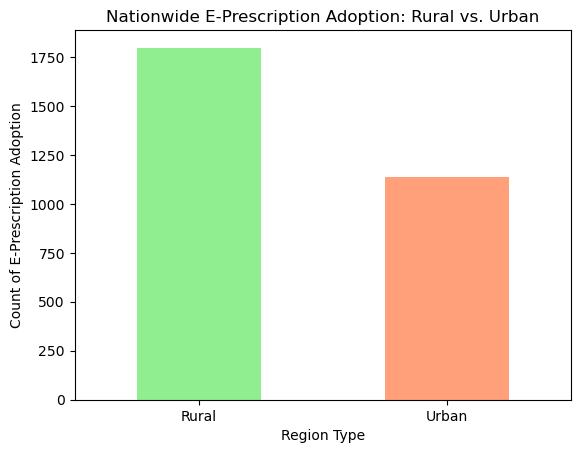

In [48]:
import matplotlib.pyplot as plt
merged_state_df['RUCC_Class'].value_counts().plot(kind='bar', color=['lightgreen', 'lightsalmon'])
plt.title('Nationwide E-Prescription Adoption: Rural vs. Urban')
plt.xlabel('Region Type')
plt.ylabel('Count of E-Prescription Adoption')
plt.xticks(rotation=0)
plt.show()

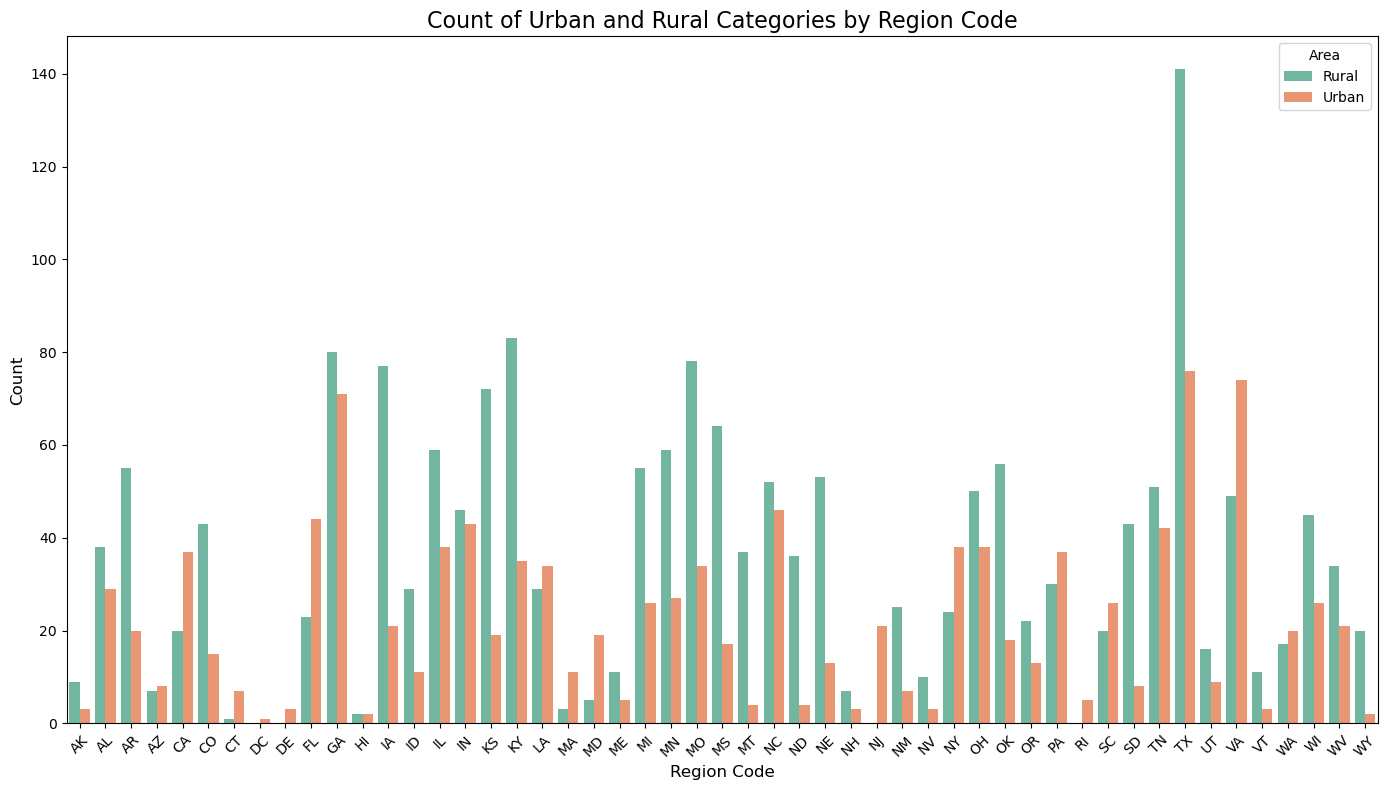

In [49]:
import seaborn as sns

plt.figure(figsize=(14, 8))

sns.barplot(x='Region Code', y='Count', hue='RUCC_Class', data=region_rural_urban_count, palette='Set2')

plt.title('Count of Urban and Rural Categories by Region Code', fontsize=16)
plt.xlabel('Region Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Area')

plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
import scipy.stats as stats

urban_data = merged_state_df[merged_state_df['RUCC_Class'] == 'Urban']['Percent of Physicians Actively Using an EHR to e-Prescribe via the Surescripts Network']
rural_data = merged_state_df[merged_state_df['RUCC_Class'] == 'Rural']['Percent of Physicians Actively Using an EHR to e-Prescribe via the Surescripts Network']

t_stat, p_value = stats.ttest_ind(urban_data, rural_data, nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between Urban and Rural counties.")
else:
    print("There is no significant difference between Urban and Rural counties.")


T-statistic: 6.403752095572116
P-value: 1.7595212751586379e-10
There is a significant difference between Urban and Rural counties.


In [50]:
region_totals = df4_cleaned.groupby('region_code')['tot_e_Rx'].sum().reset_index()
region_totals

,region_code,tot_e_Rx
0,AK,4.211502e+04
1,AL,2.717290e+05
2,AR,1.861631e+05
3,AZ,4.225418e+05
4,CA,1.797529e+06
5,CO,3.422899e+05
6,CT,3.449551e+05
7,DC,9.004548e+04
8,DE,9.591772e+04
9,FL,1.322934e+06


In [51]:
drug_totals = df1_stratified.groupby('State Code')['No. of Prescriptions'].sum().reset_index()
drug_totals

,State Code,No. of Prescriptions
0,AK,35786.0
1,AL,439925.0
2,AR,215984.0
3,AZ,588084.0
4,CA,2853671.0
5,CO,189401.0
6,CT,389161.0
7,DC,100155.0
8,DE,95541.0
9,FL,1249678.0


### **correlation coefficient**

In [60]:
# Calculate the Pearson 
correlation = merged_pres_data[['tot_e_Rx', 'No. of Prescriptions']].corr().iloc[0, 1]

print(f"Correlation coefficient between eRx adoption and number of prescriptions: {correlation}")


Correlation coefficient between eRx adoption and number of prescriptions: 0.8852338582350435


In [52]:
drug_totals.rename(columns={'State Code': 'region_code'}, inplace=True)

merged_pres_data = pd.merge(region_totals, drug_totals, on='region_code', how='inner')

merged_pres_data


,region_code,tot_e_Rx,No. of Prescriptions
0,AK,4.211502e+04,35786.0
1,AL,2.717290e+05,439925.0
2,AR,1.861631e+05,215984.0
3,AZ,4.225418e+05,588084.0
4,CA,1.797529e+06,2853671.0
5,CO,3.422899e+05,189401.0
6,CT,3.449551e+05,389161.0
7,DC,9.004548e+04,100155.0
8,DE,9.591772e+04,95541.0
9,FL,1.322934e+06,1249678.0


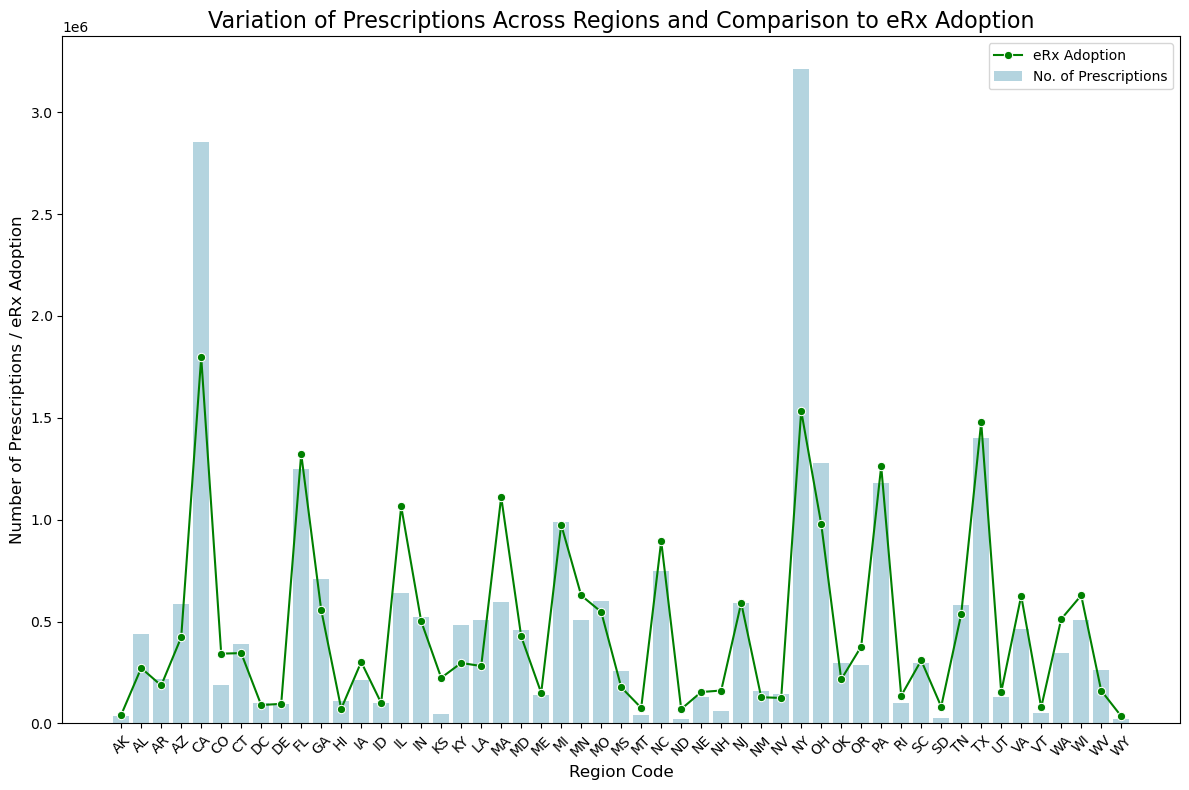

In [56]:
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.barplot(x='region_code', y='No. of Prescriptions', data=merged_pres_data, color='lightblue', label='No. of Prescriptions')

sns.lineplot(x='region_code', y='tot_e_Rx', data=merged_pres_data, color='green', marker='o', label='eRx Adoption')

plt.title('Variation of Prescriptions Across Regions and Comparison to eRx Adoption', fontsize=16)
plt.xlabel('Region Code', fontsize=12)
plt.ylabel('Number of Prescriptions / eRx Adoption', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
drug_nurse_totals = df4_cleaned.groupby('region_code')['tot_nurse_prac_e_Rx'].sum().reset_index()
drug_nurse_totals

,region_code,tot_nurse_prac_e_Rx
0,AK,9.678591e+03
1,AL,3.543223e+04
2,AR,3.161436e+04
3,AZ,7.416273e+04
4,CA,1.829476e+05
5,CO,5.089409e+04
6,CT,4.980973e+04
7,DC,1.035632e+04
8,DE,1.460825e+04
9,FL,1.700160e+05


In [55]:
df_eRx_comparison = df4[['region', 'region_code', 'period', 'tot_e_Rx', 'tot_nurse_prac_e_Rx', 'tot_phys_asst_e_Rx']].copy()

df_eRx_comparison.loc[:, 'nurse_prac_percentage'] = (df_eRx_comparison['tot_nurse_prac_e_Rx'] / df_eRx_comparison['tot_e_Rx']) * 100

df_eRx_comparison.loc[:, 'physican_assistant_percentage'] = (df_eRx_comparison['tot_phys_asst_e_Rx'] / df_eRx_comparison['tot_e_Rx']) * 100

df_grouped = df_eRx_comparison.groupby('region_code').agg({
    'nurse_prac_percentage': 'mean',
    'physican_assistant_percentage': 'mean',
}).reset_index()

df_grouped


,region_code,nurse_prac_percentage,physican_assistant_percentage
0,AK,17.761390,11.260803
1,AL,9.408577,1.543715
2,AR,13.028959,2.678924
3,AZ,13.798250,8.800454
4,CA,7.808430,6.139317
5,CO,11.571131,12.134397
6,CT,11.441940,6.184376
7,DC,8.391662,2.319505
8,DE,11.900935,4.547467
9,FL,10.117770,4.821346


In [59]:

t_stat, p_value = stats.ttest_ind(df_grouped['nurse_prac_percentage'], df_grouped['physican_assistant_percentage'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between Nurse Practitioners and Physician Assistants eRx percentages.")
else:
    print("There is no significant difference between Nurse Practitioners and Physician Assistants eRx percentages.")


T-statistic: 7.119010534390972
P-value: 1.351300873536559e-10
There is a significant difference between Nurse Practitioners and Physician Assistants eRx percentages.


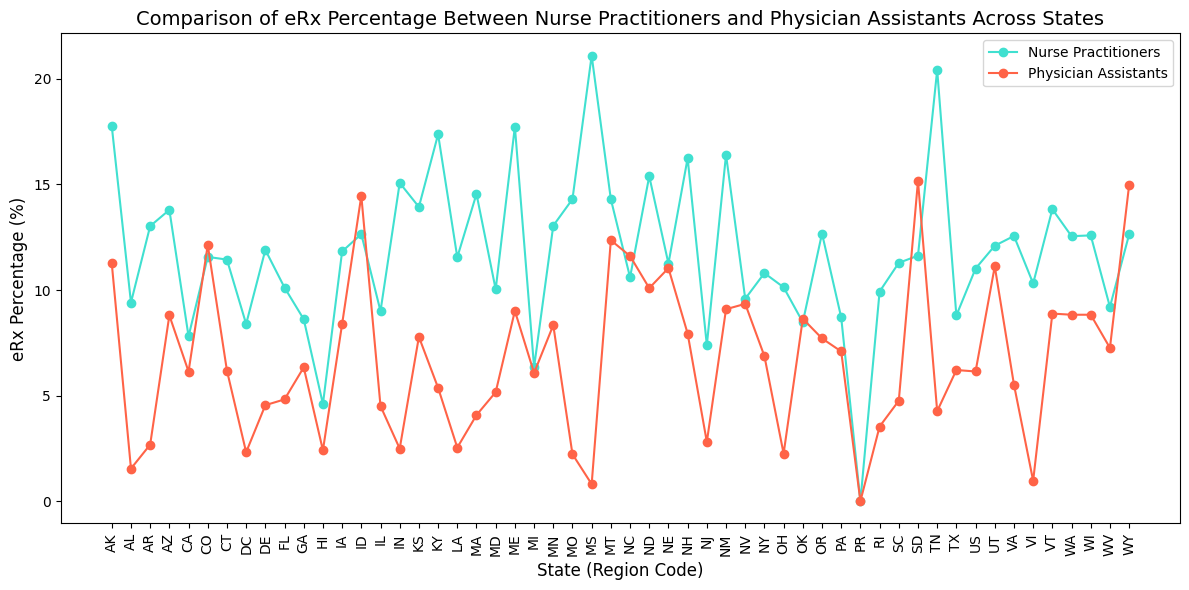

In [42]:

plt.figure(figsize=(12, 6))

plt.plot(df_grouped['region_code'], df_grouped['nurse_prac_percentage'], label='Nurse Practitioners', marker='o', color='turquoise')
plt.plot(df_grouped['region_code'], df_grouped['physican_assistant_percentage'], label='Physician Assistants', marker='o', color='tomato')

plt.xticks(rotation=90)

plt.title("Comparison of eRx Percentage Between Nurse Practitioners and Physician Assistants Across States", fontsize=14)
plt.xlabel("State (Region Code)", fontsize=12)
plt.ylabel("eRx Percentage (%)", fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()
